In [105]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt

In [464]:
columnNames = ['Row Id','Row Id.','Zip1','Zip2','Zip3','Zip4','homeowner','numchildren','income','gender',
                       'wealth','homevalue','income_med','income_avg','IC15','numpromos','donations_total','donations_max', 
                       'last_gift','donations_months','donations_time_lag','avg_gift','Donor_Indicator','donation_amt']

In [465]:
#Data Frame 'donors'
donors = pd.read_csv('C:\\Users\\micha\\Documents\\IST 652\\donors_data.csv', names=columnNames, skiprows=1)

In [466]:
#View first 10 lines of the dataset
donors.head(10)

,Row Id,Row Id.,Zip1,Zip2,Zip3,Zip4,homeowner,numchildren,income,gender,...,IC15,numpromos,donations_total,donations_max,last_gift,donations_months,donations_time_lag,avg_gift,Donor_Indicator,donation_amt
0,1,17,0,1,0,0,1,1,5,1,...,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,2,25,1,0,0,0,1,1,1,0,...,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,3,29,0,0,0,1,0,2,5,1,...,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,4,38,0,0,0,1,1,1,3,0,...,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,5,40,0,1,0,0,1,1,4,0,...,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0
5,6,53,0,1,0,0,1,1,4,1,...,28,38,73.0,10.0,10.0,31,3,7.300000,1,8.0
6,7,58,0,0,0,1,1,1,4,1,...,5,47,139.0,20.0,20.0,37,3,10.692308,1,10.0
7,8,61,1,0,0,0,1,1,1,0,...,9,77,249.0,15.0,7.0,35,3,9.576923,1,20.0
8,9,71,0,0,1,0,1,1,4,0,...,16,51,63.0,15.0,10.0,37,8,9.000000,1,5.0
9,10,87,1,0,0,0,1,1,4,1,...,8,21,26.0,16.0,16.0,30,6,13.000000,0,0.0


In [467]:
donors.shape

(3120, 24)

In [468]:
donors.dtypes

Row Id                  int64
Row Id.                 int64
Zip1                    int64
Zip2                    int64
Zip3                    int64
Zip4                    int64
homeowner               int64
numchildren             int64
income                  int64
gender                  int64
wealth                  int64
homevalue               int64
income_med              int64
income_avg              int64
IC15                    int64
numpromos               int64
donations_total       float64
donations_max         float64
last_gift             float64
donations_months        int64
donations_time_lag      int64
avg_gift              float64
Donor_Indicator         int64
donation_amt          float64
dtype: object

In [469]:
donors.describe()

,Row Id,Row Id.,Zip1,Zip2,Zip3,Zip4,homeowner,numchildren,income,gender,...,IC15,numpromos,donations_total,donations_max,last_gift,donations_months,donations_time_lag,avg_gift,Donor_Indicator,donation_amt
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,...,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.00000,3120.000000
mean,1560.500000,11615.770833,0.214423,0.185256,0.214423,0.384615,0.770192,1.069231,3.893910,0.609295,...,14.702885,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713,0.50000,6.499612
std,900.810746,6698.678131,0.410487,0.388568,0.410487,0.486582,0.420777,0.347688,1.636186,0.487987,...,12.079882,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980,0.50008,10.597849
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.00000,0.000000
25%,780.750000,5820.750000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,...,5.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092,0.00000,0.000000
50%,1560.500000,11735.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,...,12.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,0.50000,0.500000
75%,2340.250000,17435.750000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,...,21.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652,1.00000,10.000000
max,3120.000000,23293.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.000000,...,90.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,1.00000,200.000000


In [470]:
#Dropping columns that wont be used
donors = donors.drop(columns=['Row Id','Row Id.','IC15'], axis = 1)

In [471]:
# Check if any donor is in two regions
DonorZipCheckZip1 = donors[donors['Zip1'] == 1]
DonorZipCheckZip2 = donors[donors['Zip2'] == 1]
DonorZipCheckZip3 = donors[donors['Zip3'] == 1]
DonorZipCheckZip4 = donors[donors['Zip4'] == 1]
DonorZipCheckZip5 = donors[(donors['Zip1'] == 0) & (donors['Zip2'] == 0) & (donors['Zip3'] == 0) & (donors['Zip4'] == 0)]

In [472]:
# Function to flatten the region columns
def ZipCombine(row):
    if row['Zip1'] == 1:
        value = 1
    elif row['Zip2'] == 1:
        value = 2
    elif row['Zip3'] == 1:
        value = 3
    elif row['Zip4'] == 1:
        value = 4
    else:
        value = 5
    return value

In [473]:
# Run ZipCombine function to bring the Zip columns into one column
donors['Zip'] = donors.apply(ZipCombine, axis=1)

In [474]:
# Get number of donors in each region
print(len(DonorZipCheckZip1)) 
print(len(DonorZipCheckZip2)) 
print(len(DonorZipCheckZip3)) 
print(len(DonorZipCheckZip4)) 
print(len(DonorZipCheckZip5)) 

669
578
669
1200
4


In [475]:
# Add up all the lengths and divide by total length of the dataset
DonorZipCheck = (len(DonorZipCheckZip1) + len(DonorZipCheckZip2) + len(DonorZipCheckZip3) +
                        len(DonorZipCheckZip4) + len(DonorZipCheckZip5)) / len(donors)

In [476]:
print(DonorZipCheck)

1.0


In [477]:
# No compare 'DonorZipCheck_#' values to original 'zipconvert_#' to make sure they match
# The last value of 4 is not calulated because that is not an original field in the dataset. That represents the number of records that do not have a '1' in any of the 'zipconvert_# columns'
print(donors['Zip1'].sum())
print(donors['Zip2'].sum())
print(donors['Zip3'].sum())
print(donors['Zip4'].sum())

669
578
669
1200


In [478]:
#Check to make sure newly added Zip column looks good
donors.head(10)

,Zip1,Zip2,Zip3,Zip4,homeowner,numchildren,income,gender,wealth,homevalue,...,numpromos,donations_total,donations_max,last_gift,donations_months,donations_time_lag,avg_gift,Donor_Indicator,donation_amt,Zip
0,0,1,0,0,1,1,5,1,9,1399,...,74,102.0,6.0,5.0,29,3,4.857143,1,5.0,2
1,1,0,0,0,1,1,1,0,7,698,...,46,94.0,12.0,12.0,34,6,9.400000,1,10.0,1
2,0,0,0,1,0,2,5,1,8,828,...,32,30.0,10.0,5.0,29,7,4.285714,1,5.0,4
3,0,0,0,1,1,1,3,0,4,1471,...,94,177.0,10.0,8.0,30,3,7.080000,0,0.0,4
4,0,1,0,0,1,1,4,0,8,547,...,20,23.0,11.0,11.0,30,6,7.666667,0,0.0,2
5,0,1,0,0,1,1,4,1,8,482,...,38,73.0,10.0,10.0,31,3,7.300000,1,8.0,2
6,0,0,0,1,1,1,4,1,8,857,...,47,139.0,20.0,20.0,37,3,10.692308,1,10.0,4
7,1,0,0,0,1,1,1,0,7,1355,...,77,249.0,15.0,7.0,35,3,9.576923,1,20.0,1
8,0,0,1,0,1,1,4,0,5,505,...,51,63.0,15.0,10.0,37,8,9.000000,1,5.0,3
9,1,0,0,0,1,1,4,1,8,1438,...,21,26.0,16.0,16.0,30,6,13.000000,0,0.0,1


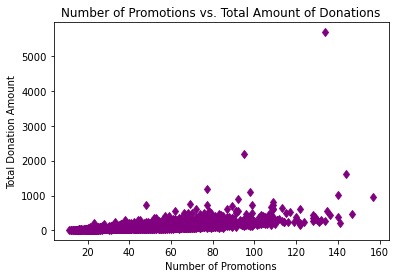

In [479]:
#Question 1: Do the number of promotions impact the Total Amount of donations?
plt.plot(donors.numpromos, donors.donations_total, 'd', color='purple')
plt.title('Number of Promotions vs. Total Amount of Donations')
plt.xlabel('Number of Promotions')
plt.ylabel('Total Donation Amount')
plt.show()

In [480]:
# Due to outliers shown above, I removed these outliers by only including donations below 1800 
new = donors[donors.donations_total <= 1800]

In [481]:
#new donors equal to the new tunning 
CleanDonors = new

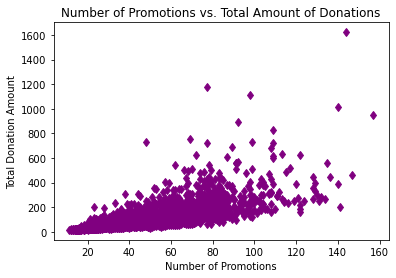

In [482]:
# Question 1 (Contd.): To get a better look at the data, I excluded the outliers that had a total value of over $1,800 
plt.plot(CleanDonors.numpromos, CleanDonors.donations_total, 'd', color='purple')
plt.title('Number of Promotions vs. Total Amount of Donations')
plt.xlabel('Number of Promotions')
plt.ylabel('Total Donation Amount')
plt.show()

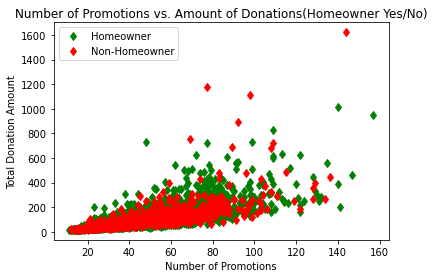

In [483]:
# Question 1 - Extended: Does being a Homeowner affect whether promotions lead to more total donations
Homeowner_Y = CleanDonors[CleanDonors.homeowner == 1]
Homeowner_N = CleanDonors[CleanDonors.homeowner == 0]
plt.plot(Homeowner_Y.numpromos, Homeowner_Y.donations_total, 'd', color='Green')
plt.plot(Homeowner_N.numpromos, Homeowner_N.donations_total, 'd', color='Red')
plt.title('Number of Promotions vs. Amount of Donations(Homeowner Yes/No)')
plt.xlabel('Number of Promotions')
plt.ylabel('Total Donation Amount')
plt.gca().legend(('Homeowner','Non-Homeowner'))
plt.show()

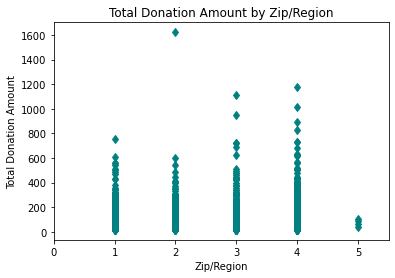

In [484]:
# Question 2: Is there a relationship between Zip/Regions and Total Amount Donated?
plt.plot(CleanDonors.Zip, CleanDonors.donations_total, 'd', color='Teal')
plt.title('Total Donation Amount by Zip/Region')
plt.xlabel('Zip/Region')
plt.ylabel('Total Donation Amount')
plt.xlim(0, 5.5)
plt.show()

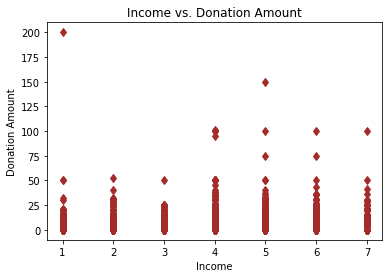

In [485]:
# Question 3: Are Income and Donation Amount correlated?
plt.plot(CleanDonors.income, CleanDonors.donation_amt, 'd', color='brown')
plt.title('Income vs. Donation Amount')
plt.xlabel('Income')
plt.ylabel('Donation Amount')
plt.show()

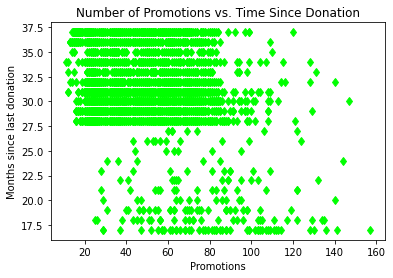

In [487]:
# Question 4: Does number of promotions infulence the time since the last donation?
plt.plot(CleanDonors.numpromos, CleanDonors.donations_months, 'd', color='lime')
plt.title('Number of Promotions vs. Time Since Donation')
plt.xlabel('Promotions')
plt.ylabel('Months since last donation')
plt.show()